## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma=0.2$.

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above


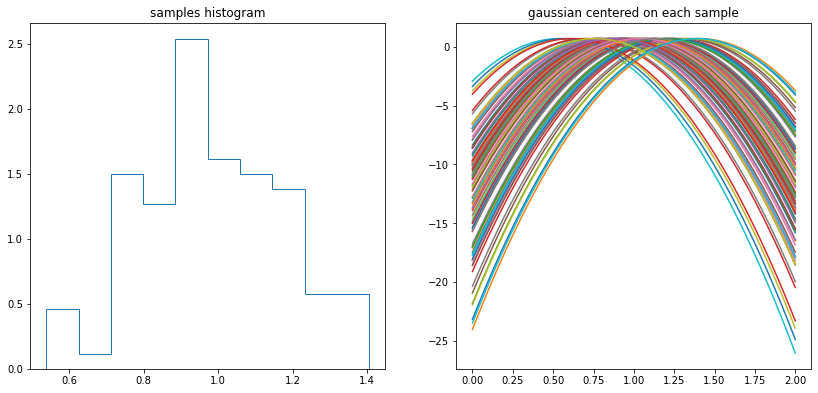

In [2]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats

Nsamples = 100

mean = 1
sigma = 0.2

samples = np.random.normal (mean, sigma, Nsamples)

fig = plt.figure(figsize=(14, 14))

ax=fig.add_subplot(221)
ax.hist(samples, int(np.sqrt(Nsamples)), density = True, histtype = 'step')
ax.set_title('samples histogram')

ax = fig.add_subplot(222)
x = np.linspace(0, 2, Nsamples)

log_llh = 0
for i in range(Nsamples): 
    llh_i = scipy.stats.norm(samples[i], sigma) #llh of each value, defined as a Gaussian centered on the value itself
    ax.set_title('gaussian centered on each sample')
    ax.plot(x, np.log(llh_i.pdf(x)))
    log_llh = log_llh - ((x - samples[i])**2) / (2*sigma)**2 #building the log of the total llh

log llh is max at: 0.98989898989899 	 while the mean is: 1


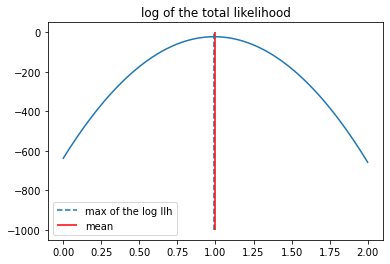

In [3]:
plt.plot(x, log_llh)
plt.title('log of the total likelihood')

x_max = x[np.argmax(log_llh)] #the x value at which the log llh is maximised
plt.vlines (x_max, -1000, 0, linestyles='dashed', label='max of the log llh')
plt.vlines (mean, -1000, 0, linestyles='solid', color='red', label='mean')
plt.legend()

print('log llh is max at:', x_max, '\t while the mean is:', mean)

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 


Our sigma estimator is 1.5971099293776576 , while the Fisher matrix error is 0.02


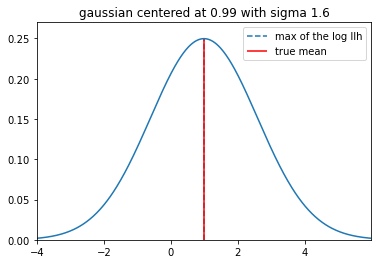

In [4]:
#-- something wrong for sure
diff_llh = np.diff(log_llh, 2)

#normalization + computation
diff_llh = np.sqrt( (diff_llh/sigma) * (-1) )
print('Our sigma estimator is', diff_llh[0], ', while the Fisher matrix error is', sigma /np.sqrt(Nsamples))

y = np.linspace(-10, 10, 1000)
gauss = scipy.stats.norm(x_max, diff_llh[0])
plt.plot(y, gauss.pdf(y))
plt.vlines (x_max, 0, 0.25, linestyles='dashed', label='max of the log llh')
plt.vlines (mean, 0, 0.25, linestyles='solid', color='red', label='true mean')
plt.xlim([x_max - 5, x_max + 5])
plt.ylim([0, 0.27])
plt.title('gaussian centered at ' + '{:.2}'.format(x_max) + ' with sigma ' + '{:.2}'.format(diff_llh[0]))
plt.legend()


### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

Text(0.5, 1.0, 'normal distribution of errors')

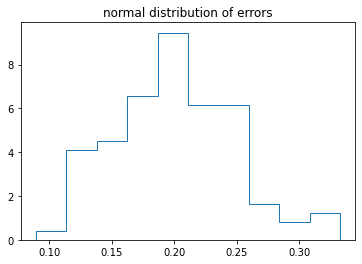

In [5]:
errors = np.random.normal (0.2, 0.05, Nsamples)

plt.hist(errors, histtype = 'step', density = True)
plt.title('normal distribution of errors')

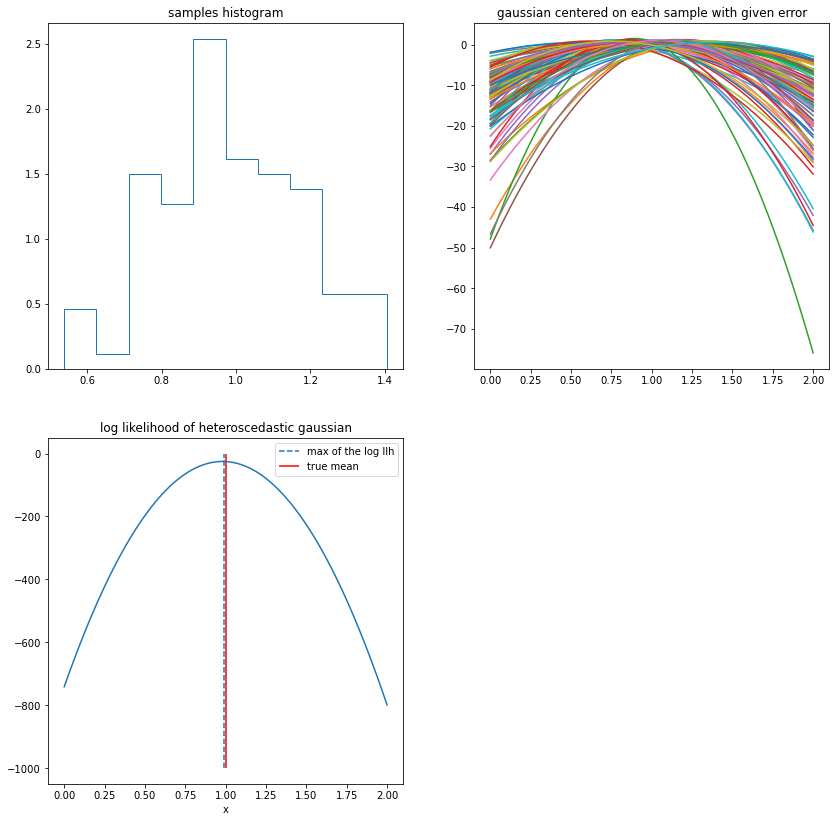

In [6]:
mean = 1
sigma = 0.2

fig = plt.figure(figsize=(14, 14))

#-- redrawing samples
ax=fig.add_subplot(221)
ax.hist(samples, int(np.sqrt(Nsamples)), density = True, histtype = 'step')
ax.set_title('samples histogram')

#-- drawing each llh
ax = fig.add_subplot(222)
x = np.linspace(0, 2, Nsamples)
het_log_llh = 0
for i in range(Nsamples): 
    het_llh_i = scipy.stats.norm(samples[i], errors[i]) #llh of each value, defined as a Gaussian centered on the value itself
    ax.set_title('gaussian centered on each sample with given error')
    ax.plot(x, np.log(het_llh_i.pdf(x)))
    het_log_llh = het_log_llh - ((x - samples[i])**2) / (2*errors[i])**2 #building the log of the total llh

#-- drawing the log of the total llh
ax = fig.add_subplot(223)
ax.plot(x, het_log_llh)
ax.set(title = 'log likelihood of heteroscedastic gaussian', xlabel='x')

#-- drawing lines of the true mean and the estimator
het_xmax = x[np.argmax(het_log_llh)] #the x value at which the log llh is maximised
ax.vlines(het_xmax, -1000, 0, linestyles='dashed', label='max of the log llh')
ax.vlines (mean, -1000, 0, linestyles='solid', color='red', label='true mean')
ax.legend()

Our sigma estimator is 1.7437035212945138 , while the true sigma is 0.2


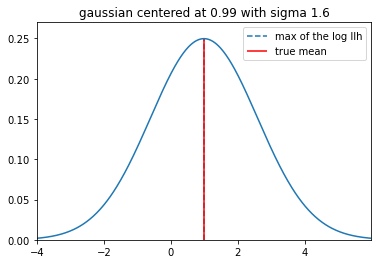

In [7]:
#-- comparing our estimated sigma to the true one
d_hetllh = np.diff(het_log_llh, 2) 
#all elements of the second derivative are the same since the gaussian is a parabola, 
#but we should take the element corresponding to our max

#normalization + computation
d_hetllh = np.sqrt( (d_hetllh/sigma) * (-1) )
print('Our sigma estimator is', d_hetllh[0], ', while the true sigma is', sigma )

y = np.linspace(-10, 10, 1000)
gauss = scipy.stats.norm(x_max, diff_llh[0])
plt.plot(y, gauss.pdf(y))
plt.vlines (x_max, 0, 0.25, linestyles='dashed', label='max of the log llh')
plt.vlines (mean, 0, 0.25, linestyles='solid', color='red', label='true mean')
plt.xlim([x_max - 5, x_max + 5])
plt.ylim([0, 0.27])
plt.title('gaussian centered at ' + '{:.2}'.format(x_max) + ' with sigma ' + '{:.2}'.format(diff_llh[0]))
plt.legend()